Standard Deviation: 4.579242819338874
Mean: 4.200558566069195
1.5% of the predictions fall within 0.5 years of the ground truths.


Text(0.5, 1.0, 'Error Distribution')

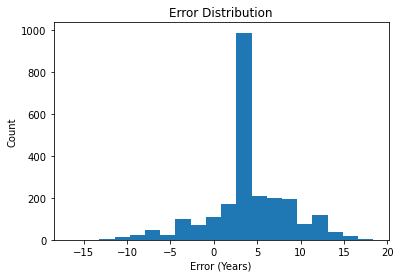

In [1]:
import pandas as pd # Pandas is used for data manipulation
import numpy as np # Use numpy to convert to arrays
import pydot
import matplotlib.pyplot as plt # Import matplotlib for plotting and use magic command for Jupyter Notebooks
from datetime import datetime
import csv

# df = pd.read_csv('Data\\Y2EOL_Data.csv') # Read in data
df = pd.read_csv('Data\\Y2EOL_Large_Dataset.csv') # Read in data
df = df.drop("INTRODUCTION_DATE", axis=1)
df = df.drop("OBSOLESCENCE_LTB_DATE", axis=1)

# eliminate the rows where the obsolete date is later than the intro date

labels = list(df.columns)

row_index = 0

while row_index < len(df):
    intro_index = labels.index("INTRO_DATE (YRS SINCE 1980)")
    obsolete_index = labels.index("ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)")
    if df.iloc[row_index,intro_index] > df.iloc[row_index,obsolete_index]: # if the introduction date is later than the obsolescence date
        df = df.drop(df.index[row_index],axis=0)
    else:
        row_index += 1

predictions = np.array(df['PREDICTION_OBSOLESCENCE_DATE (YRS SINCE 1980)'])
actuals = np.array(df['ACTUAL_OBSOLESCENCE_DATE (YRS SINCE 1980)'])

errors = predictions - actuals # Calculate the errors
std = errors.std()
print("Standard Deviation: " + str(std))
print("Mean: " + str(np.mean(errors)))

threshold = 0.5
count = 0
for error in errors:
    if abs(error) <= threshold:
        count += 1

thres_percentage = count / len(errors) * 100.0
print(str(round(thres_percentage,2)) + "%" + " of the predictions fall within " + str(threshold) + " years of the ground truths.")

plt.hist(errors,bins=20)
plt.xlabel('Error (Years)')
plt.ylabel('Count')
plt.title('Error Distribution')